In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from math import exp

### 3. Численно определить выход системы по заданному входу

In [34]:
R, R1, C = 3, 2, 5
T = (R + R1) * C
T1 = R1 * C
t = np.linspace(0, 10, 1001) #массив моментов времени

In [35]:
def step_func(t):
    if 2 < t < 5:
        return 1
    else:
        return 0

In [36]:
def sin_func(t):
    return np.sin(t)

In [37]:
x_step_vec = np.array(list(map(lambda t: 1 if 2 < t < 5 else 0, t)))
x_sin_vec = np.array(list(map(lambda t: np.sin(t), t)))

In [38]:
def pend_step(z, t, T, T1):
    x = step_func(t)
    dzdt = x / T + x / T * T1 / T - z / T
    return dzdt

In [39]:
def pend_sin(z, t, T, T1):
    x = sin_func(t)
    dzdt = x / T + x / T * T1 / T - z / T
    return dzdt

In [40]:
z0 = 0

z_step = np.squeeze(odeint(pend_step, z0, t, args=(T, T1)))
z_sin = np.squeeze(odeint(pend_sin, z0, t, args=(T, T1)))

In [42]:
def y(t, z, x, T, T1):
    res = z.copy()
    for i in range(len(t)):
        res[i] += x[i] * (T1 / T)
    return res

(0.0, 8.0)

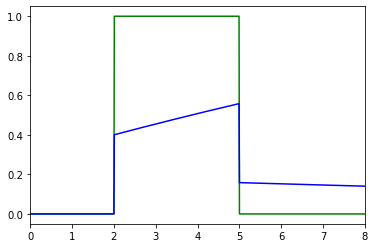

In [44]:
plt.plot(t, x_step_vec, 'g')
plt.plot(t, y(t, z_step, x_step_vec, T, T1), 'b')
plt.xlim([0, 8])

(0.0, 8.0)

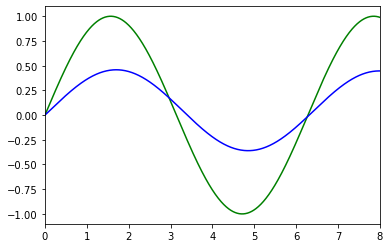

In [45]:
plt.plot(t, x_sin_vec, 'g')
plt.plot(t, y(t, z_sin, x_sin_vec, T, T1), 'b')
plt.xlim([0, 8])

### 4. Оценить коэффициенты дифференциальной системы, пользуясь методом наименьших квадратов (МНК), из сравнения реакции системы на импульсное воздействие. Графически сравнить истинную ВФ с ее параметрической оценкой.

In [46]:
def mnk(x, y, dy):
    i = 0
    for it in range(len(x)-1):
        if x[it] != x[it+1]:
            x1 = float(x[it])
            x2 = float(x[it+1])
            y1 = float(y[it])
            y2 = float(y[it+1])
            dy1 = float(dy[it])
            dy2 = float(dy[it+1])
            i = it
            
            try:
                Psi_matrix = np.array([[-y1, x1], [-y2, x2]])
                Y = np.array([dy1, dy2])
                params = np.linalg.solve(Psi_matrix, Y)
                params = np.array([[params[0]], [params[1]]])
                P = np.linalg.inv(Psi_matrix.T @ Psi_matrix) 
                break
                
            except:
                continue
    else:
        return "Вырожденная функция x"
    
    L_m = 0
    kappa = 0
    psi = 0
    
    for i in range(i+1, len(x)-2):
        
        psi = np.array([[-y[i], x[i]]])
        kappa = 1 / (1 + psi @ P @ psi.T)
        L_m = kappa * P @ psi.T
        params = params + L_m * (dy[i] - psi @ params)
        
        kappa_inv = 1 + psi @ P @ psi.T
        P = P - kappa_inv * L_m @ L_m.T
        
    return params

def params_for_g(params):
    return [np.squeeze(params[0]), -np.squeeze(params[1]) / np.squeeze(params[0])] # a, b

def params_for_H(params):
    return [1 / np.squeeze(params[0]), (-np.squeeze(params[1]) / np.squeeze(params[0]) + 1) / np.squeeze(params[0])]

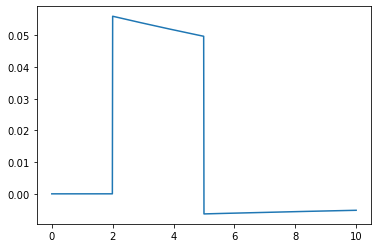

In [47]:
dz = np.empty(len(t)-1)
for i in range(len(dz)):
    dz[i] = (z_step[i+1] - z_step[i]) / (t[i+1] - t[i])
dz = np.append(dz, dz[len(dz) - 1])

plt.plot(t, dz)

In [48]:
params_g = mnk(x_step_vec, z_step, dz)
params_g = params_for_g(params_g)

print(params_g[0], ' a')
print(params_g[1], ' b')

0.039992004380330834  a
-1.3999999202797755  b


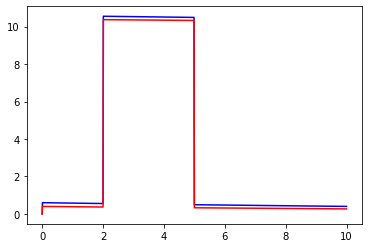

In [49]:
one = np.array(list(map(lambda t: 1 if t > 0 else 0, t)))
h = np.exp(-(1/T)*t.copy()) * one
h_pred = np.exp(-(params_g[0])*t.copy()) * one
sigma = x_step_vec

g = lambda t: (1 - T1 / T) * h + T1 * sigma
g_pred = lambda t: -(1 + params_g[1]) * h_pred - (params_g[1] + 1) /params_g[0] * sigma

plt.plot(t, g(t), 'b')
plt.plot(t, g_pred(t), 'r')

### 5. Оценить коэффициенты дифференциальной системы, пользуясь методом наименьших квадратов (МНК), из сравнения реакции системы на гармоническое воздействие. Графически сравнить истинную ЧХ с ее параметрической оценкой.

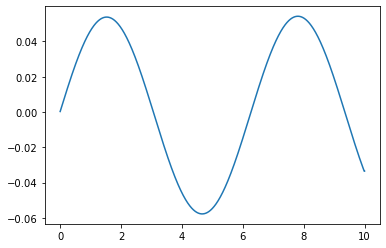

In [50]:
dz = np.empty(len(t)-1)
for i in range(len(dz)):
    dz[i] = (z_sin[i+1] - z_sin[i]) / (t[i+1] - t[i])
dz = np.append(dz, dz[len(dz) - 1])

plt.plot(t, dz)

In [51]:
params_H = mnk(x_sin_vec, z_sin, dz)
params_H = params_for_H(params_H)

print(params_H[0], ' T')
print(params_H[1], ' T1')

23.66165694480775  T
-7.713442872970706  T1


C:\Users\Sonya\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Sonya\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


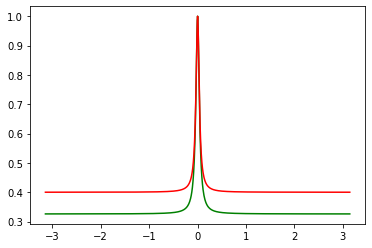

In [52]:
lbd = np.linspace(-np.pi, np.pi, len(t))
H = lambda x: (1 + 1j * x * T1) / (1 + 1j * x * T)
H_pred = lambda x: (1 - 1j * x * params_H[1]) / (1 + 1j * x * params_H[0])

plt.plot(lbd, H_pred(lbd), 'g')
plt.plot(lbd, H(lbd), 'r')